In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [46]:
def wavelet_function(input_series, filter_length=2, 
                     scaling_filter_coefficients=[1/(np.power(2, 1/2)), 1/(np.power(2, 1/2))],
                    wavelet_filter_coefficients=[-1/(np.power(2, 1/2)), 1/(np.power(2, 1/2))]):
    series_length = input_series.shape[0]
    
    w_series = np.zeros(int(series_length/2), float)
    v_series = np.zeros(int(series_length/2), float)
    for t in range(int(series_length/2)):
        lw_sum = 0
        lv_sum = 0
        for l in range(filter_length):
            lw_sum+= wavelet_filter_coefficients[l]*input_series[(2*t + 1 - l)%series_length]
            lv_sum+= scaling_filter_coefficients[l]*input_series[(2*t + 1 - l)%series_length]
        
        w_series[t] = lw_sum
        v_series[t] = lv_sum
    #w_series[int(series_length/2)] = 0
    
    w_series = w_series[~np.isnan(w_series)] 
    v_series = v_series[~np.isnan(v_series)] 
    return w_series, v_series

In [56]:
bitcoin = pd.read_csv("bitcoin.csv").drop("Date", axis=1).dropna()


In [57]:
bitcoin["Close Price"] = bitcoin["Close Price"].dropna()

In [58]:
series_length = bitcoin["Close Price"].shape[0]

In [59]:
w1, v1 = wavelet_function(bitcoin["Close Price"])
w2, v2 = wavelet_function(v1)
w3, v3 = wavelet_function(v2)
w4, v4 = wavelet_function(v3)
w5, v5 = wavelet_function(v4)

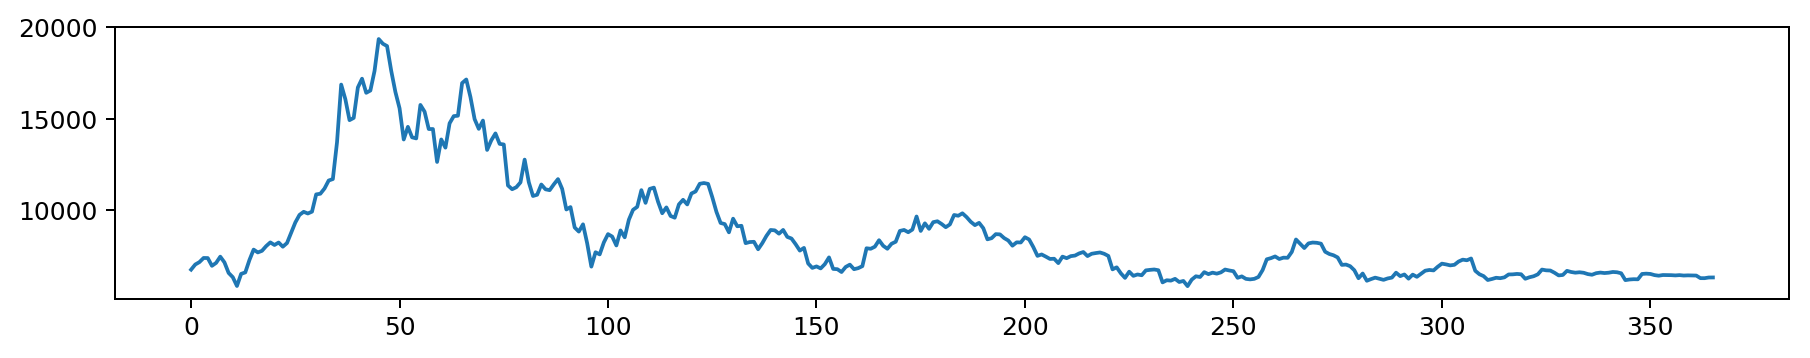

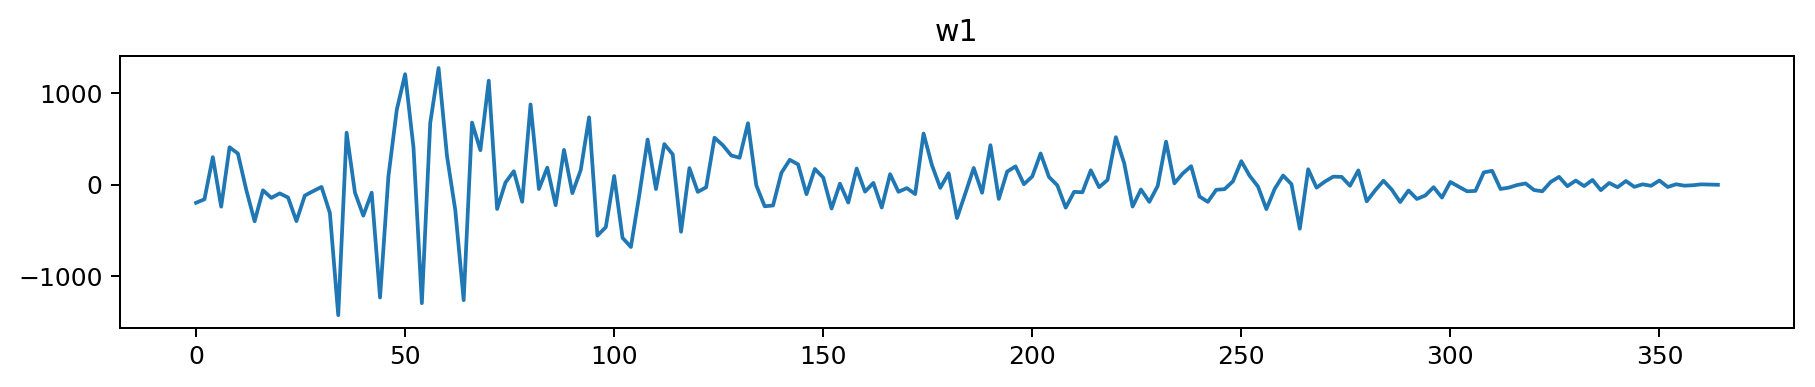

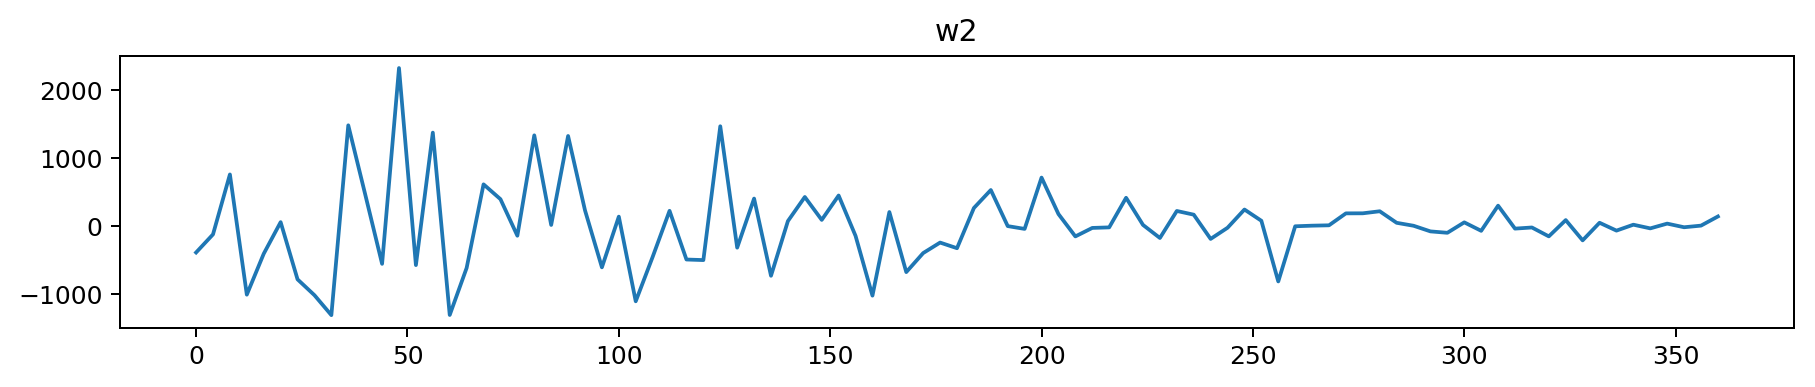

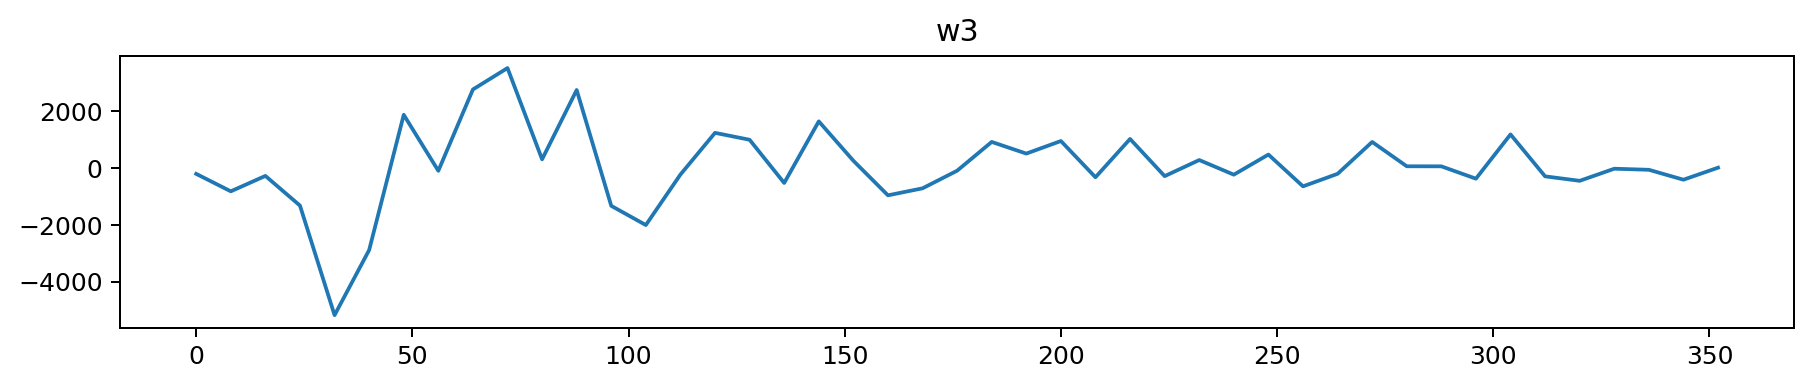

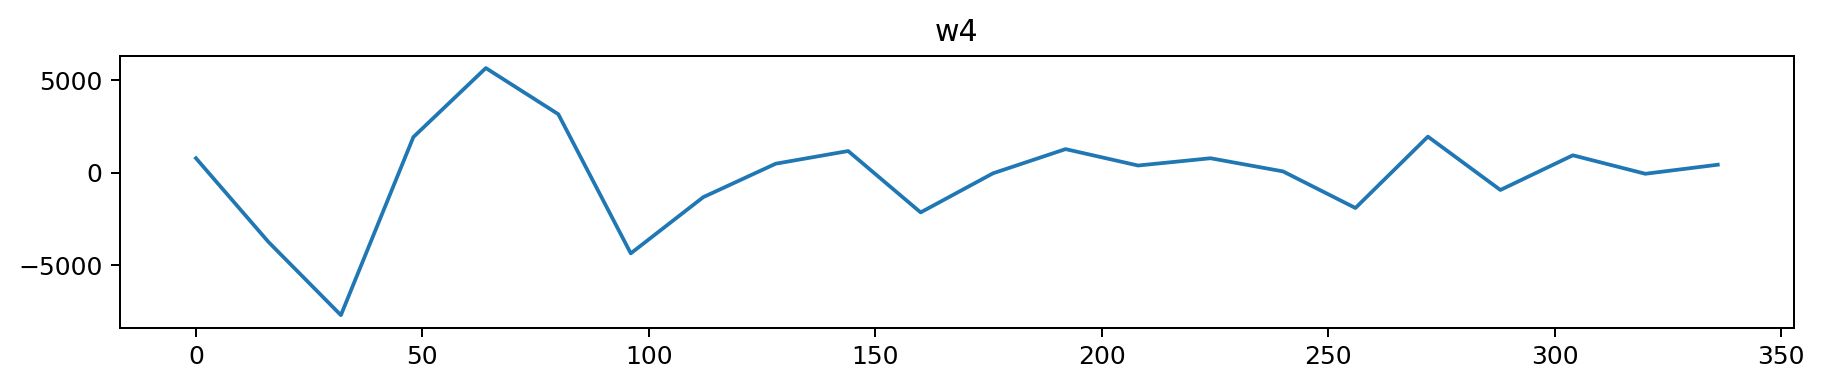

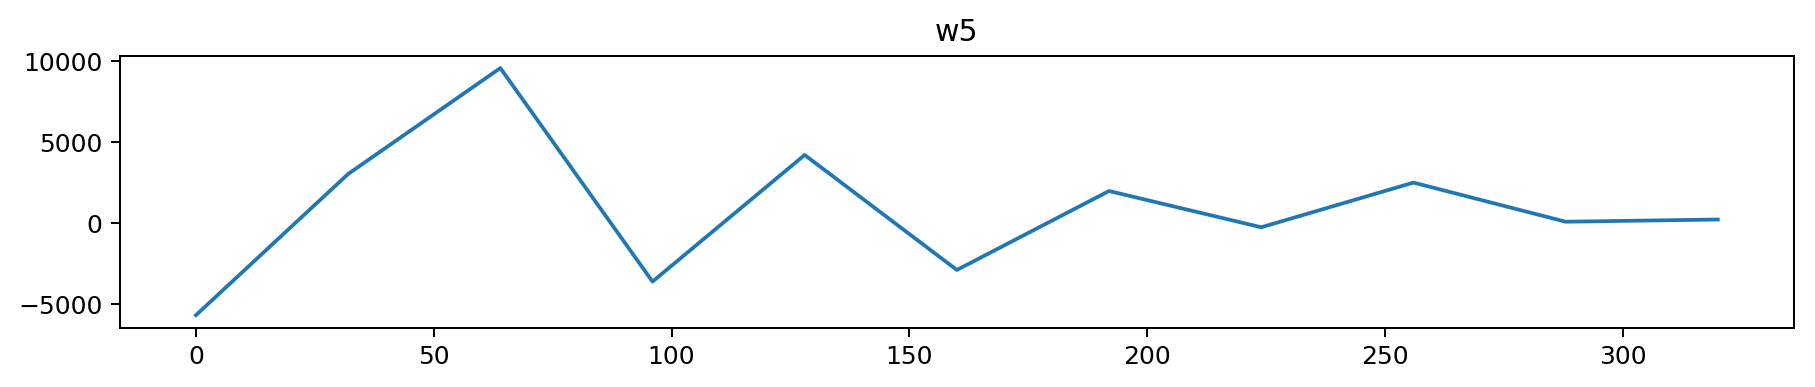

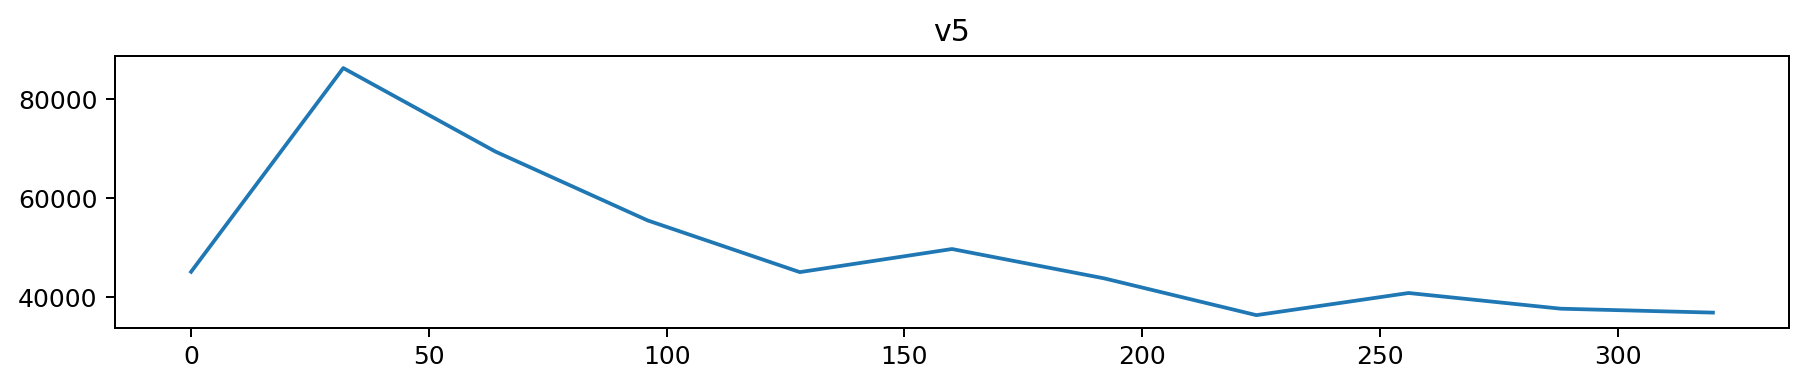

'\nfigure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor=\'w\', edgecolor=\'k\')\nplt.plot([x*16 for x in range(int(series_length/16))], v4)\nplt.title("v4")\nplt.show()\n'

In [60]:
hor_len = 12
vert_len = 2
figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot([x for x in range(series_length)], bitcoin["Close Price"])
plt.show()

figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot([x*2 for x in range(int(series_length/2))], w1)
plt.title("w1")
plt.show()

figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot([x*4 for x in range(int(series_length/4))], w2)
plt.title("w2")
plt.show()

figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot([x*8 for x in range(int(series_length/8))], w3)
plt.title("w3")
plt.show()

figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot([x*16 for x in range(int(series_length/16))], w4)
plt.title("w4")
plt.show()

figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot([x*32 for x in range(int(series_length/32))], w5)
plt.title("w5")
plt.show()

figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot([x*32 for x in range(int(series_length/32))], v5)
plt.title("v5")
plt.show()
'''
figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot([x*16 for x in range(int(series_length/16))], v4)
plt.title("v4")
plt.show()
'''



In [61]:
w1.shape

(183,)